In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Analysis

In [2]:
df = sns.load_dataset("diamonds")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
col = 'price'
df = df[[c for c in df.columns if c != col] + [col]]

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   x        53940 non-null  float64 
 7   y        53940 non-null  float64 
 8   z        53940 non-null  float64 
 9   price    53940 non-null  int64   
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [6]:
df.describe()

,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


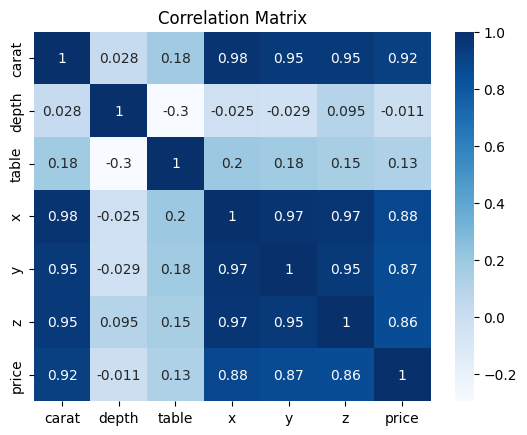

In [7]:
# corr matrix
num_col=['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
corr_matrix = df[num_col].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

In [8]:
# x y z are too much correlated with carat
df = df.drop(columns = ['x', 'y', 'z'])

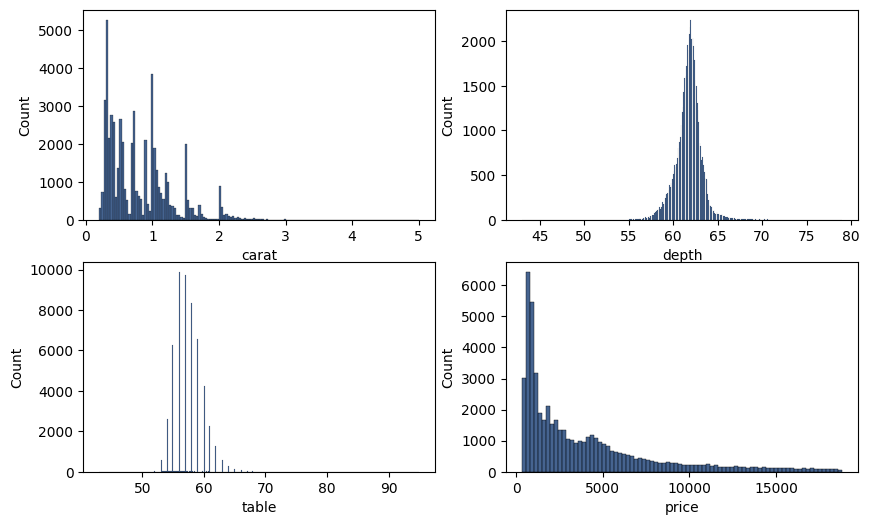

In [9]:
# num columns histograms
num_col=['carat', 'depth', 'table', 'price']
plt.figure(figsize=(10, 6))
for i, col in enumerate(num_col, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], color='#08306B')
plt.show()


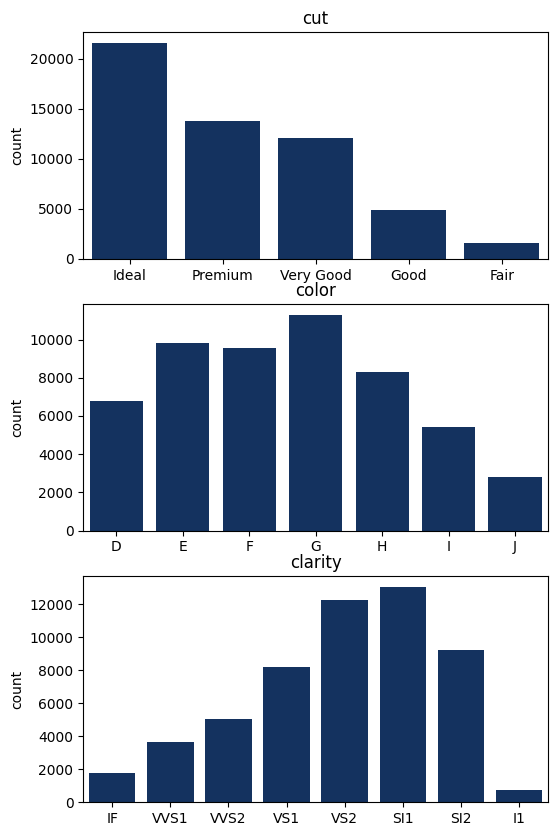

In [10]:
cat_cols = ['cut', 'color', 'clarity']
plt.figure(figsize=(6, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 1, i)
    sns.countplot(x=df[col], color='#08306B')
    plt.title(col)
    plt.xlabel(None)
plt.show()


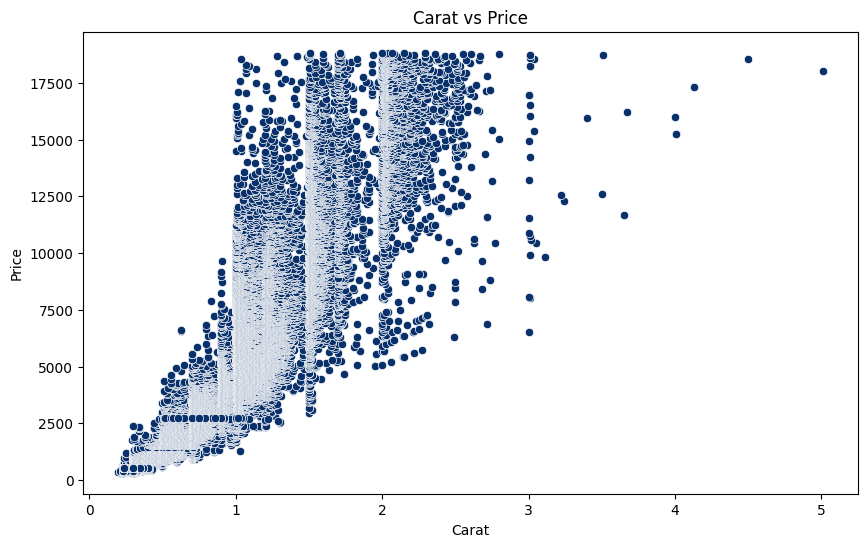

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', data=df, color='#08306B')
plt.title('Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

# -> numeric cols

In [12]:
df = pd.get_dummies(df, columns=['color', 'clarity', 'cut'], drop_first=True)

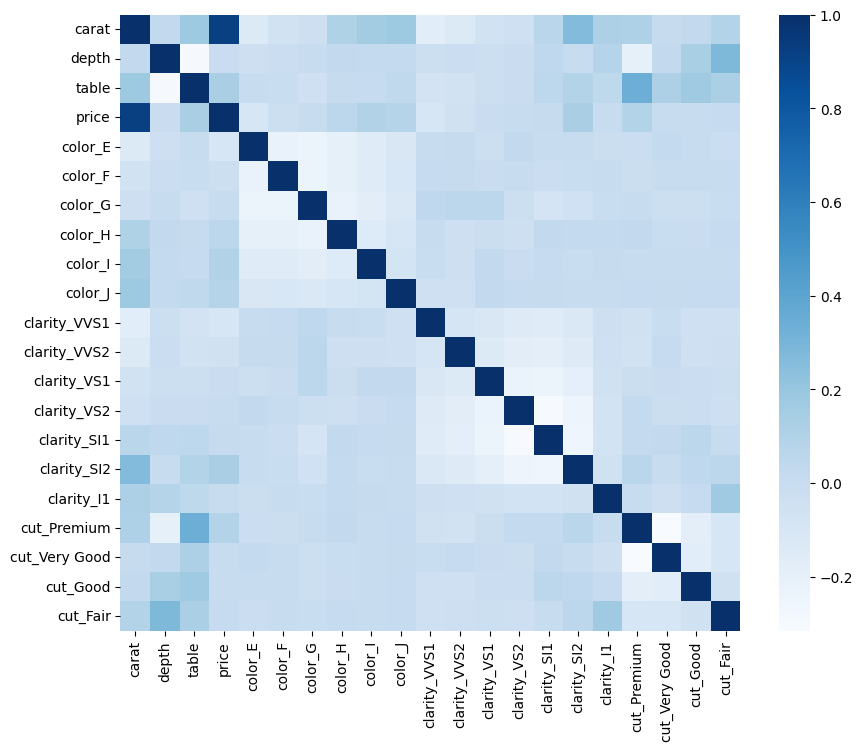

In [13]:
# corr all cols
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='Blues')
plt.show()

# ML

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [15]:
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
dt = DecisionTreeRegressor(min_samples_leaf=8, min_samples_split=20, max_features=None, random_state=42)
dt.fit(X_train, y_train)

y_pred_test = dt.predict(X_test)
y_pred_train = dt.predict(X_train)

rmse_train_dt = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train_dt = mean_absolute_error(y_train, y_pred_train)
r2_train_dt = r2_score(y_train, y_pred_train)

print("TRAIN RMSE:", rmse_train_dt)
print("TRAIN MAE:", mae_train_dt)
print("TRAIN R²:", r2_train_dt)

rmse_test_dt = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test_dt = mean_absolute_error(y_test, y_pred_test)
r2_test_dt = r2_score(y_test, y_pred_test)

print("TEST RMSE:", rmse_test_dt)
print("TEST MAE:", mae_test_dt)
print("TEST R²:", r2_test_dt)

TRAIN RMSE: 493.5889974460768
TRAIN MAE: 259.37869690689604
TRAIN R²: 0.9846963507179454
TEST RMSE: 619.0797432590969
TEST MAE: 319.3709602880721
TEST R²: 0.9758907949184156


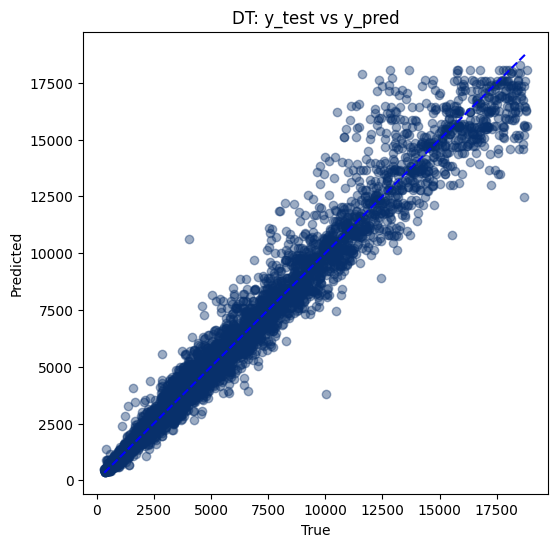

In [17]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test, alpha=0.4, color='#08306B')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("DT: y_test vs y_pred")
plt.show()

In [18]:
xgb = XGBRegressor(
    learning_rate=0.1,
    max_depth=8,
    n_estimators=200,
    subsample=1.0,
    colsample_bytree=1.0,
    objective='reg:squarederror',
    random_state=42,
)

xgb.fit(X_train, y_train)

y_pred_train = xgb.predict(X_train)

rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train_xgb = mean_absolute_error(y_train, y_pred_train)
r2_train_xgb = r2_score(y_train, y_pred_train)

print("TRAIN RMSE:", rmse_train_xgb)
print("TRAIN MAE:", mae_train_xgb)
print("TRAIN R²:", r2_train_xgb)

y_pred_test = xgb.predict(X_test)

rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test_xgb = mean_absolute_error(y_test, y_pred_test)
r2_test_xgb = r2_score(y_test, y_pred_test)

print("TEST RMSE:", rmse_test_xgb)
print("TEST MAE:", mae_test_xgb)
print("TEST R²:", r2_test_xgb)

TRAIN RMSE: 389.43916004300337
TRAIN MAE: 209.7578582763672
TRAIN R²: 0.9904732704162598
TEST RMSE: 559.3832261964958
TEST MAE: 278.58428955078125
TEST R²: 0.9803162217140198


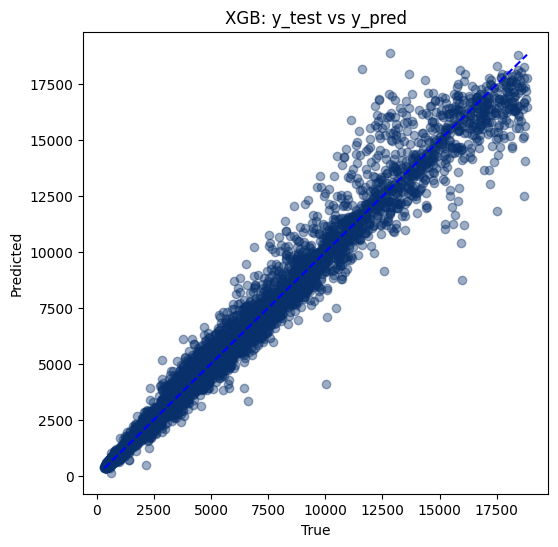

In [19]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test, alpha=0.4, color='#08306B')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("XGB: y_test vs y_pred")
plt.show()

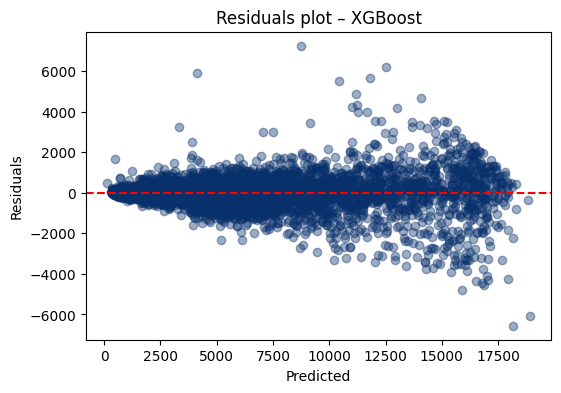

In [20]:
residuals_xgb = y_test - y_pred_test

plt.figure(figsize=(6,4))
plt.scatter(y_pred_test, residuals_xgb, alpha=0.4, color='#08306B')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals plot – XGBoost")
plt.show()

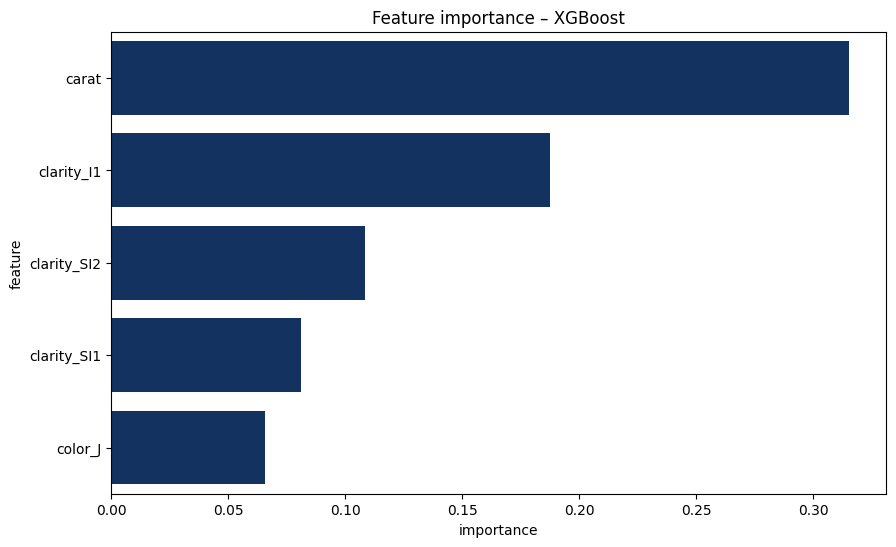

In [21]:
importances = xgb.feature_importances_
feature_names = X_train.columns

feat_imp = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)
top5= feat_imp.head(5)
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=top5, color='#08306B')
plt.title("Feature importance – XGBoost")
plt.show()

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_train = lr.predict(X_train_scaled)

rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train_lr = mean_absolute_error(y_train, y_pred_train)
r2_train_lr = r2_score(y_train, y_pred_train)

print("TRAIN RMSE:", rmse_train_lr)
print("TRAIN MAE:", mae_train_lr)
print("TRAIN R²:", r2_train_lr)

y_pred_test = lr.predict(X_test_scaled)

rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test_lr = mean_absolute_error(y_test, y_pred_test)
r2_test_lr = r2_score(y_test, y_pred_test)

print("TEST RMSE:", rmse_test_lr)
print("TEST MAE:", mae_test_lr)
print("TEST R²:", r2_test_lr)

TRAIN RMSE: 1154.9882535729412
TRAIN MAE: 805.134416162725
TRAIN R²: 0.9162047890769673
TEST RMSE: 1159.6136989416802
TEST MAE: 801.5595426757378
TEST R²: 0.9154105155614831


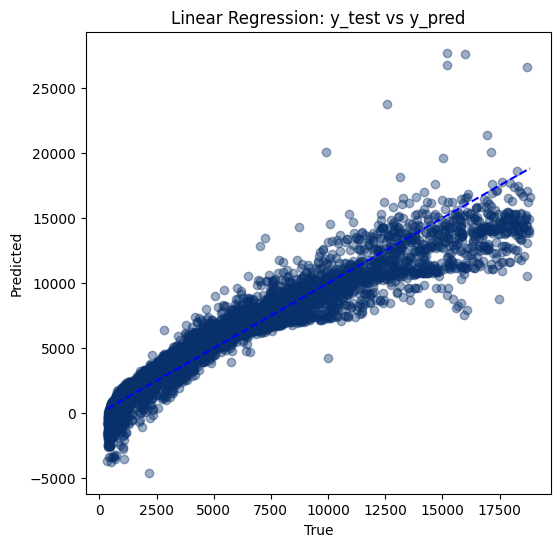

In [23]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test, alpha=0.4, color='#08306B')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("Linear Regression: y_test vs y_pred")
plt.show()

In [24]:
results = pd.DataFrame({
    'Model': ['Decision Tree', 'XGBoost', 'Linear Regression'],
    'RMSE_train': [rmse_train_dt, rmse_train_xgb, rmse_train_lr],
    'RMSE_test':  [rmse_test_dt,  rmse_test_xgb,  rmse_test_lr],
    'MAE_train':  [mae_train_dt,  mae_train_xgb,  mae_train_lr],
    'MAE_test':   [mae_test_dt,   mae_test_xgb,   mae_test_lr],
    'R2_train':   [r2_train_dt,   r2_train_xgb,   r2_train_lr],
    'R2_test':    [r2_test_dt,    r2_test_xgb,    r2_test_lr]
})

results = results.round(3)
results

,Model,RMSE_train,RMSE_test,MAE_train,MAE_test,R2_train,R2_test
0,Decision Tree,493.589,619.080,259.379,319.371,0.985,0.976
1,XGBoost,389.439,559.383,209.758,278.584,0.990,0.980
2,Linear Regression,1154.988,1159.614,805.134,801.560,0.916,0.915


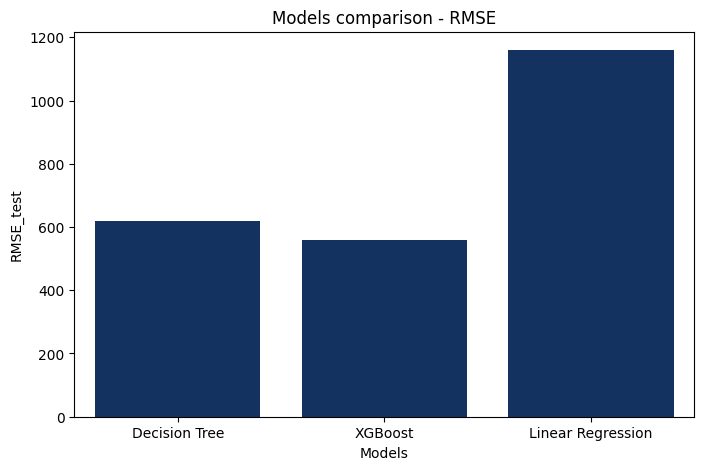

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='RMSE_test', data=results, color='#08306B')
plt.xlabel("Models")
plt.ylabel("RMSE_test")
plt.title("Models comparison - RMSE")
plt.show()